# Assignment 4: Fisher Implementation

<font color=blue><b>1- Import Needed Packages</b></font>

In [114]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import pandas as pd 
import seaborn as sns

### Get the current directory path

In [72]:
home_path = os.getcwd()
home_path

'/Users/hesham/Downloads/Fisher/Test'

<font color=blue><b>2- Load Images </b></font>

In [73]:
path='/Users/hesham/Downloads/Fisher/Train/'
os.chdir(path)

Images=os.listdir()



In [74]:
print(type(Images))# How Does it store

<class 'list'>


In [75]:
print(len(Images)) # To know number of them

2401


In [76]:
train_labels=Images.pop(Images.index('Training Labels.txt'))
train_labels=np.loadtxt(train_labels)
print(train_labels)
print(len(Images))


[0. 0. 0. ... 9. 9. 9.]
2400


<font color=blue><b>3-Sort them and read them </b></font>

In [77]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images1)):
    ImagF1=imageio.imread(Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))


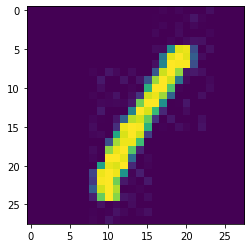

In [78]:
plt.imshow(ImagF[240,:].reshape(28,28))

In [79]:
ImagF.shape

me=m1(ImagF)
se=S1(ImagF,me)
me.shape

(784, 1)

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [80]:
def m1(c1):
    #Calculate mean of the intended class 
    m1=np.mean(c1,axis=0).reshape(-1,1)
    return m1
def m2(c2):
    #Calculate mean of the other classes
    
    m2=np.mean(c2,axis=0).reshape(-1,1)
    
    
    return m2

In [81]:
def S1(c1,m1):
    # Calculate First Term of SW
    
    S1_t=np.zeros((c1.shape[1],c1.shape[1]))
    for i in c1 :
        row=i.reshape(-1,1)
        S1_t +=(row-m1)@((row-m1).T)
        
    return S1_t 
def S2(c2,m2):
    
    #Calculate Second Term of SW
    S2_t=np.zeros((c2.shape[1],c2.shape[1]))
    for j in c2 :
        row2=j.reshape(-1,1)
        S2_t +=(row2-m2)@((row2-m2).T)
        
   
    return S2_t

In [82]:
W=np.zeros((10,784))
W_o=np.zeros((10,1))
counter=0 
for i in range(0,len(Images1),240):
    
    imagecopy1=ImagF.copy()
    if i < len(Images1) :
        
    #Get First Class say c1
          c1=imagecopy1[i:i+240]
    #Get Other Classes say c2
          c2=np.delete(imagecopy1,np.s_[i:i+240],axis=0)          
    #Get Means
          mean1=m1(c1)
          mean2=m2(c2)
    
    #Calculate SW
          Sw=S1(c1,mean1)+S2(c2,mean2)
    #Calculate its invers "Note Use pinv function"
          Sw_inv=np.linalg.pinv(Sw)
    #Calculate Weigths of the intended class 
          w=Sw_inv.dot((mean1-mean2)).reshape(1,-1)
          W[counter,:]=w
    #Calculate W_bias of it
          W_o[counter]=-w@(mean1+mean2)/2
          counter+=1
        
    else:
          break
        
        


<font color=blue ><b>5-Testing Phase </b></font>

accuracy = 83.0 %


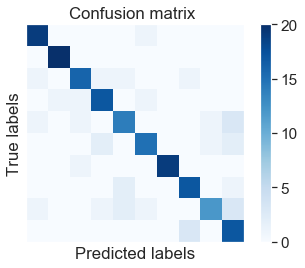

In [130]:
#-----------------Testing---------------
path2='/Users/hesham/Downloads/Fisher/Test//'

os.chdir(path2)
Test_Image=os.listdir()


Test_Labels=Test_Image.pop(Test_Image.index('Test Labels.txt'))

Test_Labels=np.loadtxt('Test Labels.txt')

Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
for i in range(len(Test_Image1)):
    Imag=imageio.imread(Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
    
# Calculate Predicted Y 
Y_predicted = (np.dot(Imag_T,W.T)) + W_o.T 
# Calculate Predicted Labels
pred_labels = Y_predicted.argmax(axis =1)

#Calculate Accuracy and Print it
accuracy = (pred_labels == Test_Labels).mean()*100
print('accuracy =',accuracy,'%')

#Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST

import sklearn.metrics as metrics
cm = metrics.confusion_matrix(Test_Labels, pred_labels)


plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()



In [ ]:
#note: the whole code runing without any error so please if any error arise in your 
#local device please tell me before any minus 
#thanks